In [1]:
import matplotlib
from matplotlib import pyplot as plt
import pandas as pd

from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

import seaborn as sns

In [3]:
TB_SA = pd.read_csv('data/tb_sa.csv')

In [4]:
# Tamanho default das figuras
matplotlib.rcParams['figure.figsize'] = (15.0, 9.0)
plt.style.use('seaborn-colorblind')
plt.ion()

In [5]:
def getDataByXHab(data, column, X=100000):
  return data[column]/data['e_pop_num']*X

### Primeira pergunta: É possível traçar um perfil entre a quantidade de casos de tuberculose e o tamanho da população?

Hipótese nula: O tamanho da população não afeta o número proporcional de casos de tuberculose.

Hipótese alternativa: O tamanho da população afeta o número proporcional de casos de tuberculose.

In [13]:
plot_data = TB_SA[['e_inc_num', 'e_pop_num']].copy()
plot_data['e_inc_num'] = getDataByXHab(plot_data, 'e_inc_num')

X = plot_data['e_pop_num'].values.reshape(-1,1)
y = plot_data['e_inc_num'].values.reshape(-1,1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

lin_regr = linear_model.LinearRegression()
lin_regr.fit(X_train, y_train)

y_pred = lin_regr.predict(X_test)

print(f'Coefficient: {lin_regr.coef_[0][0]:.2f}')
print(f'Intercept: {lin_regr.intercept_[0]:.2f}')
print(f'Mean squared error: {mean_squared_error(y_test, y_pred):.2f}' )
print(f'R2: {r2_score(y_test, y_pred):.2f}')

Coefficient: -0.00
Intercept: 60.63
Mean squared error: 1670.92
R2: 0.00


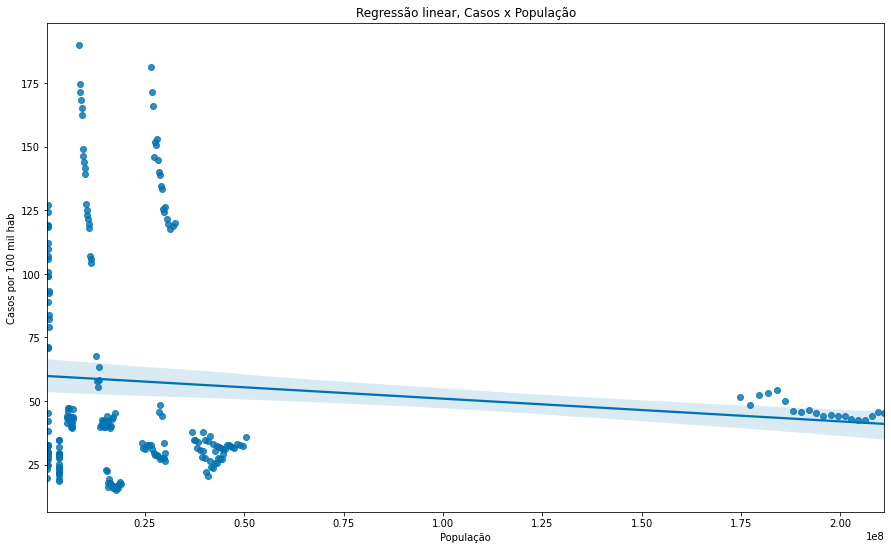

In [14]:
ax = sns.regplot(x='e_pop_num', y='e_inc_num', data=plot_data)
ax.set(xlabel='População', ylabel='Casos por 100 mil hab')
plt.title('Regressão linear, Casos x População')
plt.show()

In [9]:
plot_data = TB_SA[TB_SA['iso3'] != 'BRA'].copy()

plot_data['e_inc_num'] = getDataByXHab(plot_data, 'e_inc_num')

X = plot_data['e_pop_num'].values.reshape(-1,1)
y = plot_data['e_inc_num'].values.reshape(-1,1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

lin_regr = linear_model.LinearRegression()
lin_regr.fit(X_train, y_train)

y_pred = lin_regr.predict(X_test)

print(f'Coefficient: {lin_regr.coef_[0][0]:.2f}')
print(f'Intercept: {lin_regr.intercept_[0]:.2f}')
print(f'Mean squared error: {mean_squared_error(y_test, y_pred):.2f}' )
print(f'R2: {r2_score(y_test, y_pred):.2f}')

Coefficient: -0.00
Intercept: 66.01
Mean squared error: 1914.29
R2: -0.01


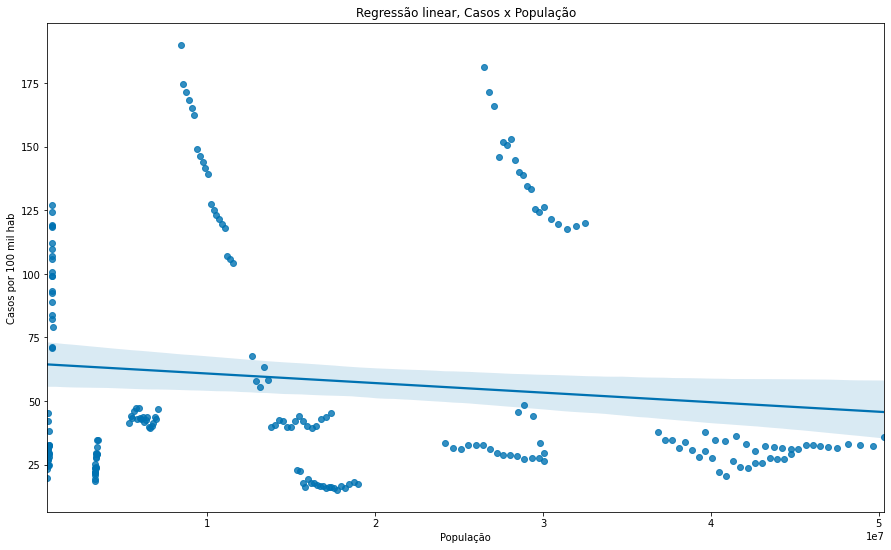

In [12]:
ax = sns.regplot(x='e_pop_num', y='e_inc_num', data=plot_data)
ax.set(xlabel='População', ylabel='Casos por 100 mil hab')
plt.title('Regressão linear, Casos x População')
plt.show()

### Teste
Através de uma regressão linear realizada entre casos por 100 mil habitantes por número de habitantes, parece surgir uma leve tendência decrescente.

O segundo gráfico mostra a mesma regressão excluindo os dados do Brasil que, por possuir aproximadamente metade da população do continente, torna o gráfico mais difícil de se visualizar.

### Variável de confusão

Apesar da aparente tendência decrescente, analisamos que a possível correlação entre tamanho da população e casos por 100 mil habitantes é espúria, afetada por uma variável de confusão não presente nos dados da OMS. Países tendem a ter populações maiores quão mais desenvolvidos economica e socialmente são, e essa variável que teria correlação com casos por 100 mil habitantes, pois mais desenvolvimento implica em maior acesso à saúde e maior qualidade dos serviços.